In [ ]:
from transformers import pipeline
import torch
from transformers import AutoModel, AutoTokenizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random


c:\Users\angel\Desktop\LCP_B_GPT2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Initialize the text generation pipeline
generator = pipeline("text-generation", model="gpt2", device=-1)  # Use device=0 for GPU, or device=-1 for CPU
output = generator("Q: What is the capital of France? A: Paris. Q: What is the capital of Italy? A:", max_length=30, temperature=0.9, num_return_sequences=3)

#IDK se è utile ma ci sono modi per forzare le parole che genera. 

# Print the generated text
for idx, generated_text in enumerate(output):
    print(f"Generated Text {idx + 1}: {generated_text['generated_text']}")


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text 1: Q: What is the capital of France? A: Paris. Q: What is the capital of Italy? A: Rome. Q: What is
Generated Text 2: Q: What is the capital of France? A: Paris. Q: What is the capital of Italy? A: Pompeii. Q: What
Generated Text 3: Q: What is the capital of France? A: Paris. Q: What is the capital of Italy? A: Naples. Q: What is


In [ ]:

model = AutoModel.from_pretrained( "gpt2", output_hidden_states=True)  #load pretrained from Hugging Face
tokenizer = AutoTokenizer.from_pretrained("gpt2")                     #trasforma input in token

In [ ]:

#text = ["Q: What is the capital of France? A: Paris. Q: What is the capital of Italy? A:"]
text=["pear", "apple", "orange", "banana"]  #you can add more input

"""If the tokenizer being used doesn't already have a pad_token, this line assigns the eos_token (end-of-sequence token) as the padding token.
Padding is necessary when working with batches of varying sequence lengths to ensure all sequences have the same length."""
tokenizer.pad_token = tokenizer.eos_token

# Generate embeddings for multiple inputs
#tokenize input
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
print(inputs)

print(f"Batch size: { inputs["input_ids"].shape[0]}")  #print(N_of_input)


{'input_ids': tensor([[  431,   283],
        [18040, 50256],
        [43745, 50256],
        [ 3820,  2271]]), 'attention_mask': tensor([[1, 1],
        [1, 0],
        [1, 0],
        [1, 1]])}
Batch size: 4


In [ ]:
# Get the model's outputs
with torch.no_grad():
    outputs = model(**inputs)

# Extract the hidden states
hidden_states = outputs.hidden_states  # dim->(batch size, sequence_length, hidden_size)
print(hidden_states)



(tensor([[[ 0.0135, -0.3651,  0.0232,  ..., -0.1219, -0.1720,  0.0284],
         [-0.0253, -0.1751, -0.1928,  ...,  0.2048, -0.1754,  0.1351]],

        [[ 0.1008, -0.3901,  0.2345,  ..., -0.0812, -0.1004, -0.1227],
         [ 0.0753, -0.0815, -0.0449,  ...,  0.0412,  0.1654,  0.1205]],

        [[-0.0340, -0.1402,  0.0893,  ..., -0.1466,  0.1908,  0.1484],
         [ 0.0753, -0.0815, -0.0449,  ...,  0.0412,  0.1654,  0.1205]],

        [[ 0.0833, -0.2190,  0.0753,  ..., -0.1383, -0.0266, -0.0706],
         [-0.1934, -0.1699, -0.1105,  ..., -0.0710, -0.2576,  0.1693]]]), tensor([[[ 0.4989, -2.3301,  1.1138,  ..., -0.1141,  0.8569, -0.1273],
         [-2.5326, -0.8460, -1.4901,  ..., -0.1130,  0.0218, -0.3458]],

        [[ 1.0389, -0.5693,  0.0695,  ...,  0.9786,  0.6406, -0.0963],
         [ 0.5586,  0.6627, -0.0115,  ...,  1.3753,  1.1653,  0.0897]],

        [[ 1.2281,  0.3953, -0.7972,  ...,  0.6017,  0.0364,  0.4298],
         [ 0.6965,  0.1239, -0.1137,  ...,  1.8569,  1.4987, -0

**PLOT EMBEDDING SPACE FOR A SPECIFIC BATCH**

0
torch.Size([768])


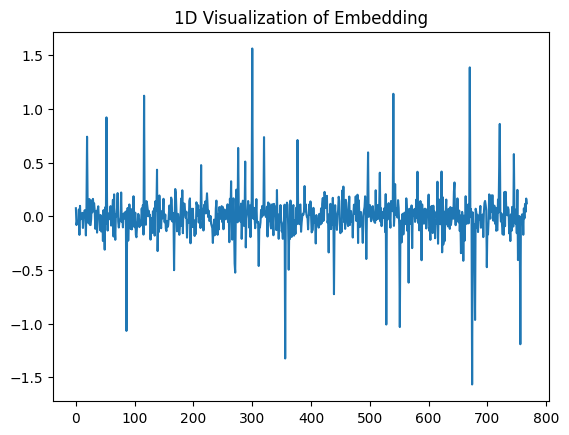

1
torch.Size([768])


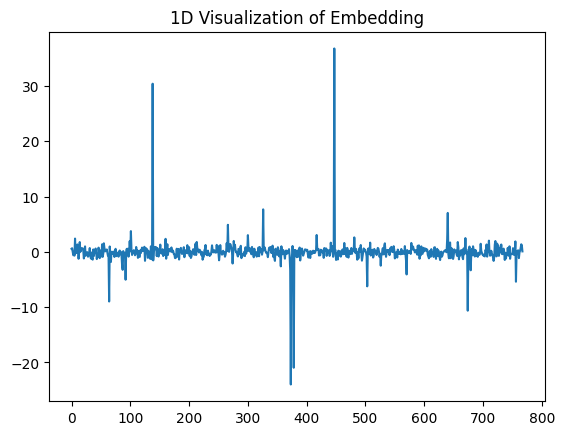

2
torch.Size([768])


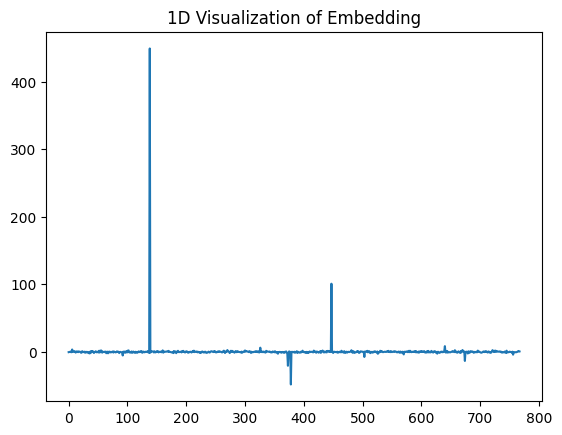

3
torch.Size([768])


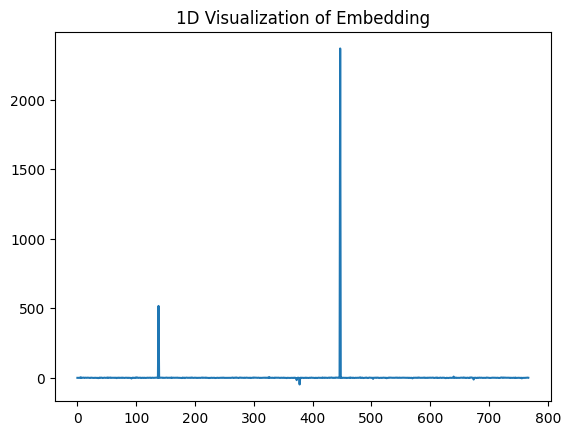

4
torch.Size([768])


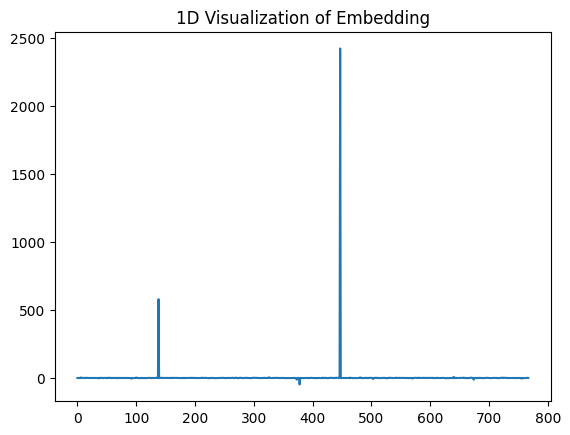

5
torch.Size([768])


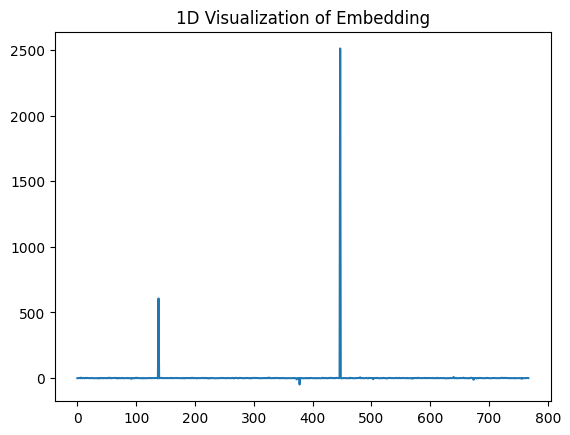

6
torch.Size([768])


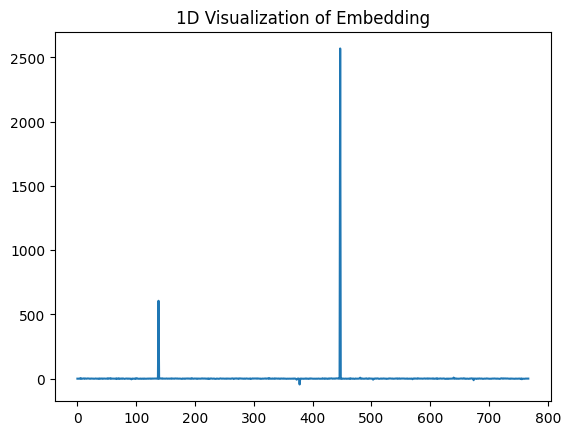

7
torch.Size([768])


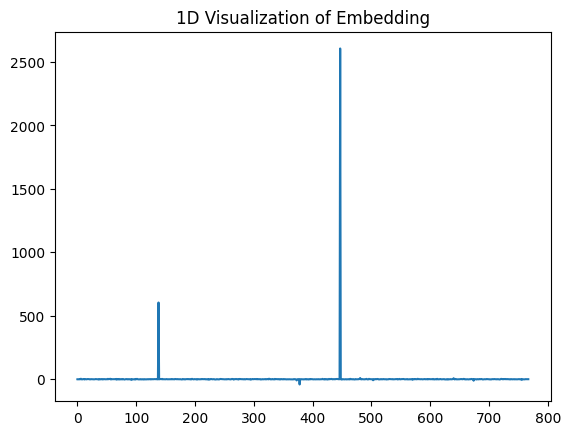

8
torch.Size([768])


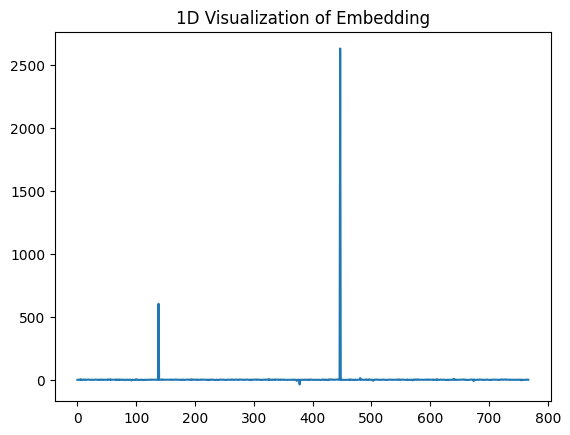

9
torch.Size([768])


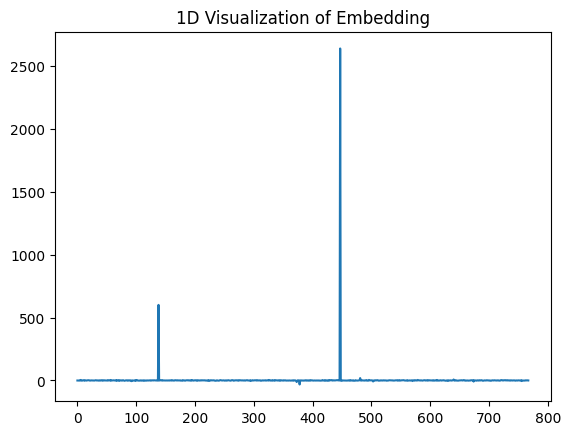

10
torch.Size([768])


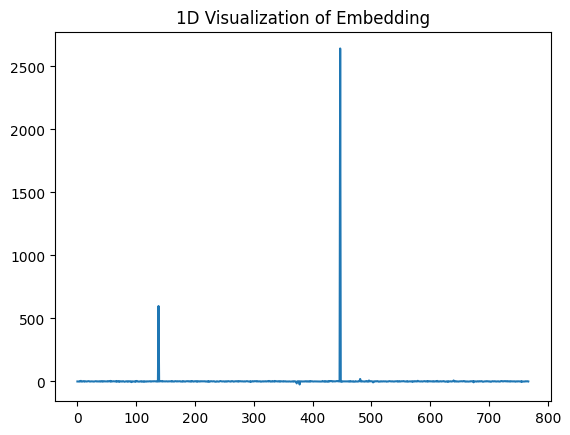

11
torch.Size([768])


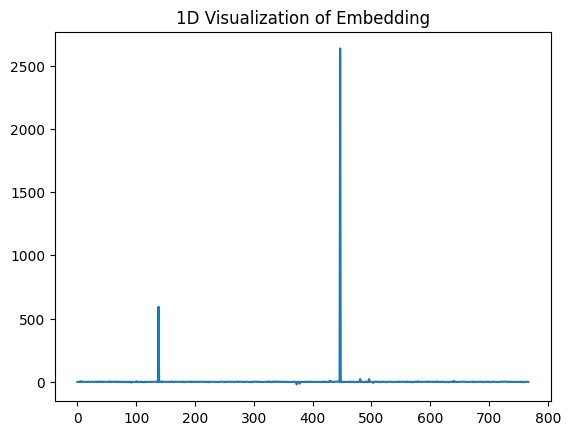

12
torch.Size([768])


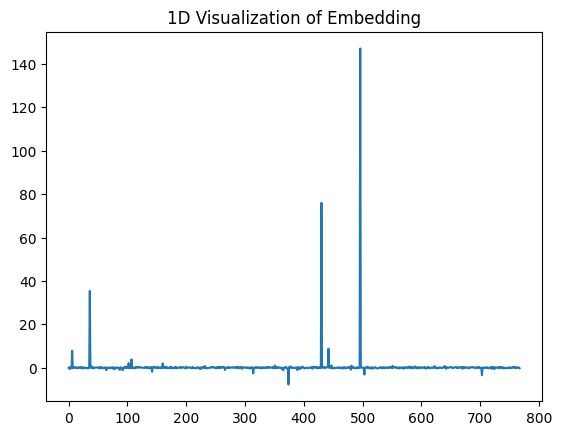

In [ ]:

#ENTROPY 
#projection of that cevotrs

for i in range(len(hidden_states)):
    print(i)
    last_hidden_layer = hidden_states[i]
    embeddings = last_hidden_layer[1, -1, :]  # Shape: (batch_size, embedding_dim)  I'M TAKING FIRST TOKEN 
    print(embeddings.shape)
    plt.plot(embeddings.numpy().flatten())
    plt.title("1D Visualization of Embedding")
    plt.show()

**PLOT ALL BATCH TOGHEDER**

Layer 0
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


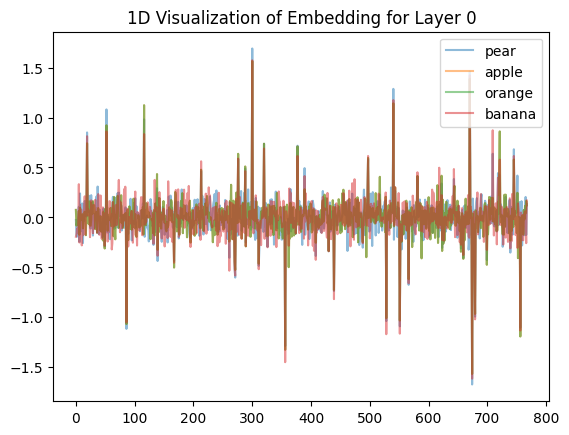

Layer 1
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


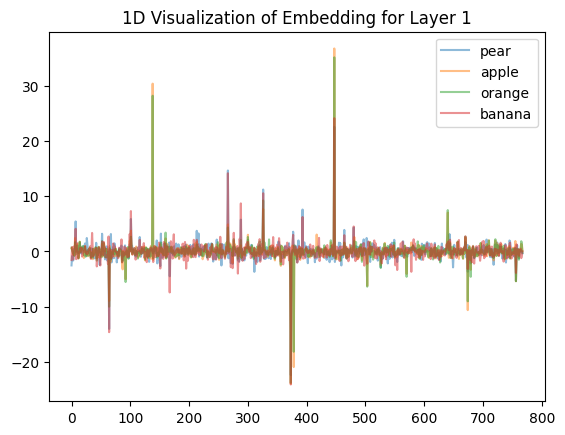

Layer 2
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


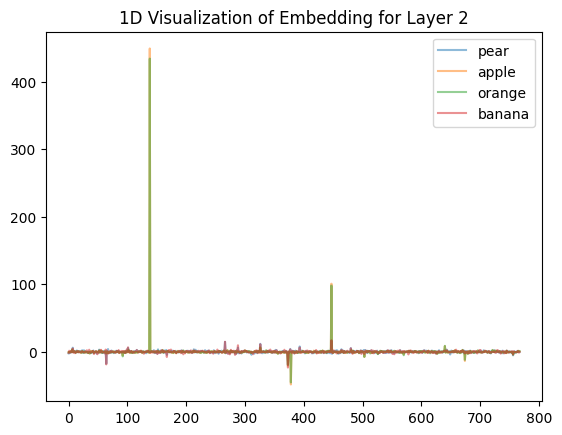

Layer 3
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


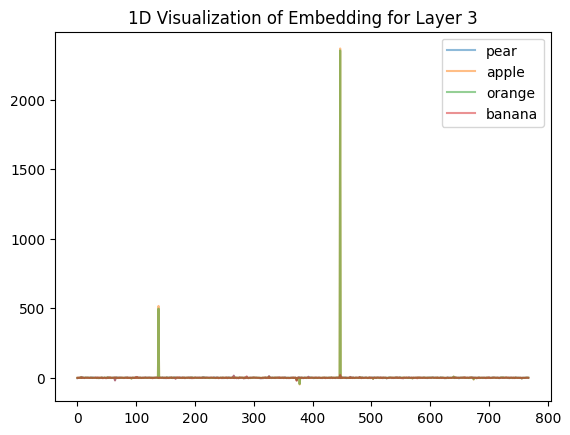

Layer 4
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


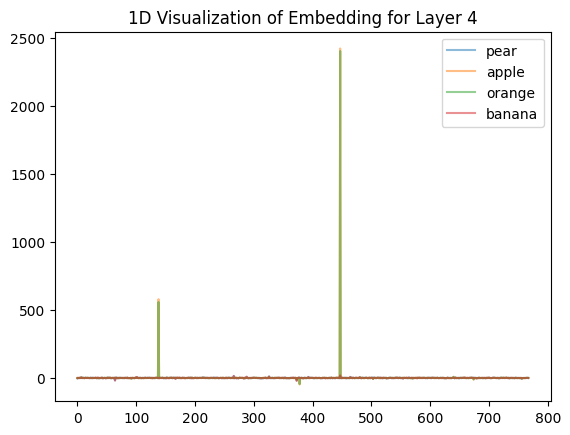

Layer 5
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


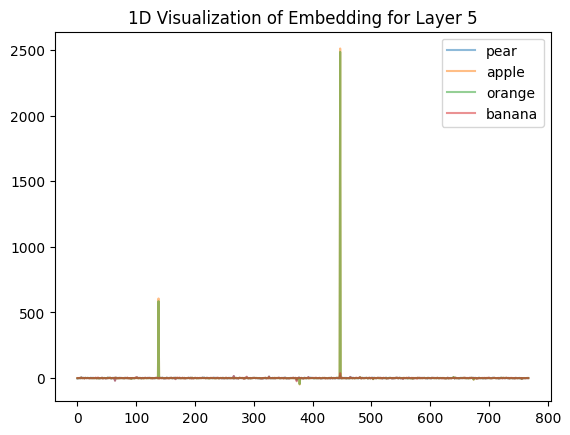

Layer 6
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


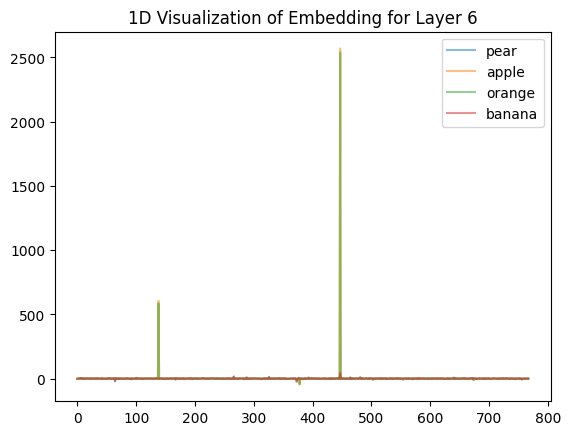

Layer 7
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


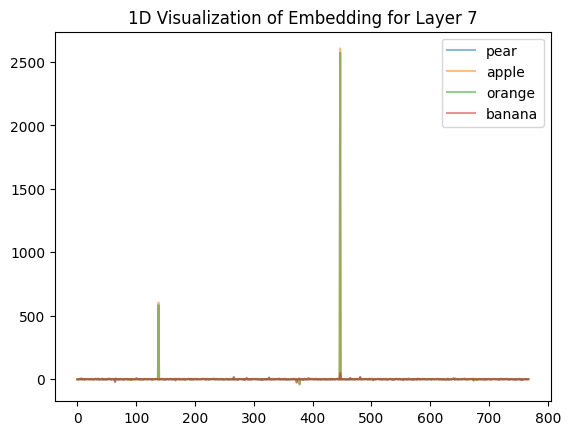

Layer 8
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


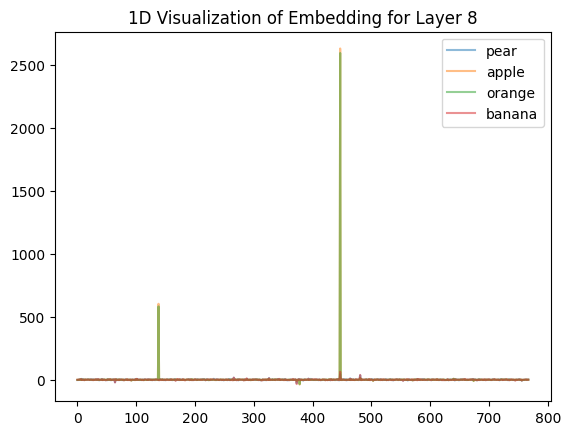

Layer 9
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


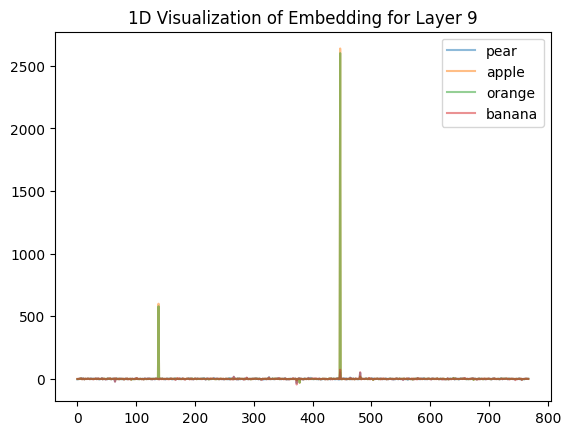

Layer 10
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


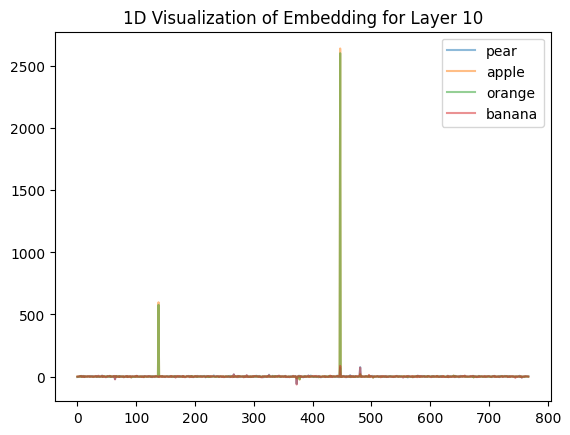

Layer 11
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


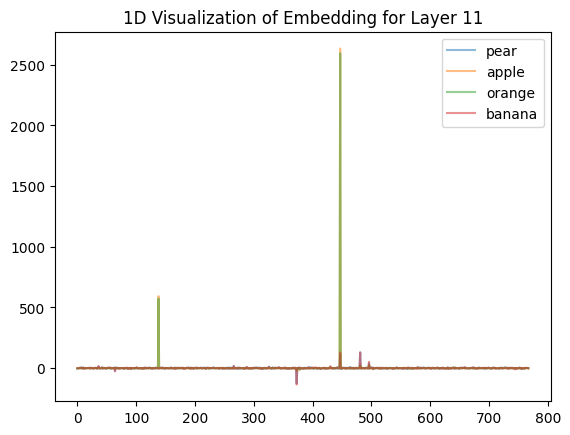

Layer 12
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


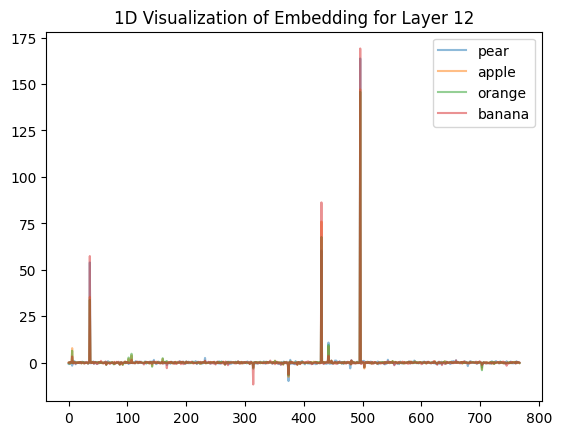

In [ ]:
#FA SCHIFO, però ero curioso di vedere se ci fossero "correlazioni" in comune.
# secondo voi si può dire che nell'ultimo layer i picchi rappresentano le caratteristiche in comune (in questo caso-> frutta)?


for i in range(len(hidden_states)):
    print(f"Layer {i}")
    last_hidden_layer = hidden_states[i]  # Shape: (batch_size, sequence_length, hidden_size)
    
  
    for batch_idx in range(last_hidden_layer.shape[0]):  # batch dimension
        embeddings = last_hidden_layer[batch_idx, -1, :]  # Take the last token's embedding for each batch
        print(f"Batch {batch_idx} Embedding Shape: {embeddings.shape}")
        plt.plot(embeddings.numpy().flatten(), label=f"{text[batch_idx]}", alpha=0.5)
    

    plt.title(f"1D Visualization of Embedding for Layer {i}")
    plt.legend() 
    plt.show()

In [ ]:

"""The value of each dimension indicates how strongly the input data correlates with that feature.
For example:

One dimension might encode sentiment (positive/negative).
Another dimension might encode part-of-speech information (noun, verb).
Yet another might encode syntactic relationships (subject, object).
However, these features are not human-interpretable, as they are learned automatically during training."""

"""Positive Values: Strong activation or alignment with the feature.
Negative Values: Negative correlation or opposite alignment with the feature.
Values Near Zero: Weak or no correlation with the feature."""

'Positive Values: Strong activation or alignment with the feature.\nNegative Values: Negative correlation or opposite alignment with the feature.\nValues Near Zero: Weak or no correlation with the feature.'

In [ ]:
inputs

{'input_ids': tensor([[  431,   283],
        [18040, 50256],
        [43745, 50256],
        [ 3820,  2271]]), 'attention_mask': tensor([[1, 1],
        [1, 0],
        [1, 0],
        [1, 1]])}

### Short Prompts (1–5 words)
Good for analyzing minimal context and word-level embeddings.

- "Sunset"

- "The quick fox"

- "Hello world"

- "Once upon a"

- "Artificial intelligence"

### Medium Prompts (6–15 words)
Useful for observing basic syntactic and semantic patterns.

- "The cat sat on the warm windowsill and purred quietly."

- "He opened the door to find a mysterious package waiting."

- "Deep learning has revolutionized computer vision and natural language processing."

- "A sudden noise startled her while she was reading a book."

- "The recipe called for eggs, flour, sugar, and a pinch of salt."

### Long Prompts (16–50 words)
Better for studying how GPT-2 processes extended context or narrative flow.

- "The scientist carefully adjusted the settings on the control panel, knowing that one wrong move could trigger a catastrophic failure that would destroy years of research and potentially endanger lives."

- "In a future where machines have gained consciousness, a lone programmer works tirelessly to insert a backdoor into the system, hoping to reclaim control of a world slipping away."

- "During the final debate, the candidate made a passionate appeal to unity, addressing both critics and supporters, promising transparency, economic reform, and a renewed focus on international cooperation."

### Very Long Prompt (50+ words)
Use this to test GPT-2’s capacity limits, token truncation, and how it handles deeper coherence.

- "As the storm raged outside, Maria sat by the fireplace, recalling the last letter her brother had sent before disappearing in the mountains. It spoke of a hidden temple, an ancient curse, and a secret he had vowed to protect at all costs. Her hands trembled as she read it again."

(Prompt with dialogue and descriptive elements)
- "“I never asked for this,” he whispered, staring at the broken mask in his hands. Around him, the ruins of the facility burned, casting eerie shadows on the bloodstained walls. Footsteps echoed in the corridor—someone was still alive. And they were looking for him."

In [ ]:
prompts = {
    "short": [
        "Sunset",
        "The quick fox",
        "Hello world",
        "Once upon a",
        "Artificial intelligence"
    ],
    "medium": [
        "The cat sat on the warm windowsill and purred quietly.",
        "He opened the door to find a mysterious package waiting.",
        "Deep learning has revolutionized computer vision and natural language processing.",
        "A sudden noise startled her while she was reading a book.",
        "The recipe called for eggs, flour, sugar, and a pinch of salt."
    ],
    "long": [
        "The scientist carefully adjusted the settings on the control panel, knowing that one wrong move could trigger a catastrophic failure that would destroy years of research and potentially endanger lives.",
        "In a future where machines have gained consciousness, a lone programmer works tirelessly to insert a backdoor into the system, hoping to reclaim control of a world slipping away.",
        "During the final debate, the candidate made a passionate appeal to unity, addressing both critics and supporters, promising transparency, economic reform, and a renewed focus on international cooperation."
    ],
    "very_long": [
        "As the storm raged outside, Maria sat by the fireplace, recalling the last letter her brother had sent before disappearing in the mountains. It spoke of a hidden temple, an ancient curse, and a secret he had vowed to protect at all costs. Her hands trembled as she read it again.",
        "“I never asked for this,” he whispered, staring at the broken mask in his hands. Around him, the ruins of the facility burned, casting eerie shadows on the bloodstained walls. Footsteps echoed in the corridor—someone was still alive. And they were looking for him."
    ]
}

# TO USE:
# for category, prompt_list in prompts.items():
#    for prompt in prompt_list:
#        inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)
#        outputs = model(**inputs)
#        # your embedding analysis here...


In [ ]:
prompt = "The American flags color are red, blue and"
inputs = tokenizer(prompt, return_tensors="pt")
input_ids = inputs["input_ids"]
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

print("🧾 Tokens:")
for idx, tok in enumerate(tokens):
    print(f"{idx:2}: {tok}")


NameError: name 'tokenizer' is not defined

In [ ]:
with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits  # Shape: [1, seq_len, vocab_size]
attentions = outputs.attentions  # List of [1, n_heads, seq_len, seq_len]


In [ ]:
top_k = 10
vocab_size = logits.shape[-1]

print("\n🔮 Top-10 Predictions at Each Step:")
for step in range(logits.shape[1]):
    probs = torch.softmax(logits[0, step], dim=-1)
    top_probs, top_indices = torch.topk(probs, k=top_k)
    top_tokens = tokenizer.convert_ids_to_tokens(top_indices.tolist())
    print(f"\nStep {step:2} | Token: {tokens[step]}")
    for rank in range(top_k):
        print(f"  {rank+1:2}: {top_tokens[rank]:>12} ({top_probs[rank].item():.4f})")


In [ ]:
def plot_attention_matrix(att_matrix, tokens, layer=0, head=0):
    attn = att_matrix[layer][0, head].detach().numpy()
    sns.heatmap(attn, xticklabels=tokens, yticklabels=tokens, cmap="viridis", square=True, cbar=True)
    plt.title(f"Attention Heatmap | Layer {layer}, Head {head}")
    plt.xlabel("Key Tokens")
    plt.ylabel("Query Tokens")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Example: Layer 0, Head 0
plot_attention_matrix(attentions, tokens, layer=0, head=0)
